<a href="https://colab.research.google.com/github/ArtemBurenok/theory_of_prediction/blob/main/trend_seasonality_ACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Time Series.xls', sheet_name='Давление в абсорбере')

In [ ]:
data.head()

,"P, кгс/см2"
0,NaN
1,70.700745
2,70.698978
3,70.700861
4,70.700947


In [ ]:
data.dropna(inplace=True)

# Тренд

### 1. Постройте график зависимости давления от времени (“облако точек”) и его автокорреляционную функцию (ACF).

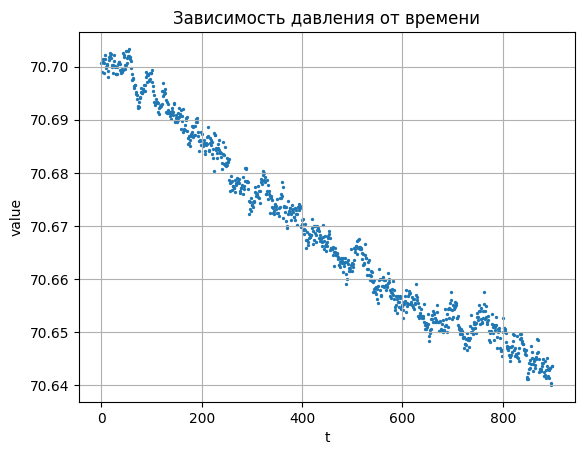

In [ ]:
plt.scatter(range(data.shape[0]), data, s=1.9)
plt.xlabel("t")
plt.ylabel("value")
plt.title("Зависимость давления от времени")
plt.grid()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

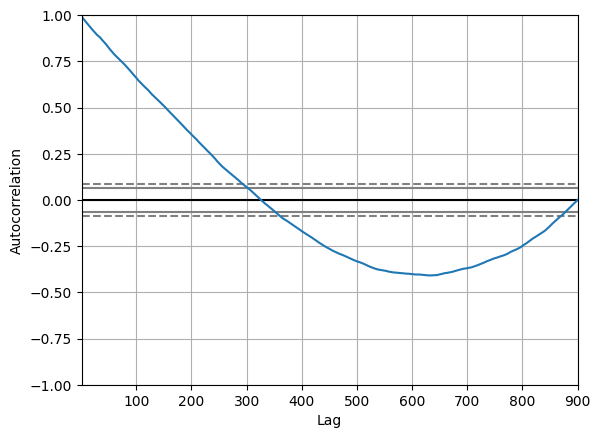

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)

### 2. Попробуйте привести ряд к стационарному виду двумя методами:

(a) методом наименьших квадратов оцените линейный тренд;

(b) вычислите разности ∆P = (1 − B)P, где B – оператор сдвига назад.

Методом наименьших квадратов

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
data_square = poly.fit_transform(np.array(range(data.shape[0])).reshape(-1, 1))

In [ ]:
data_square

array([[0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.00000e+00],
       [2.00000e+00, 4.00000e+00],
       ...,
       [8.97000e+02, 8.04609e+05],
       [8.98000e+02, 8.06404e+05],
       [8.99000e+02, 8.08201e+05]])

In [ ]:
lin_model = LinearRegression()
lin_model.fit(data_square, data)

LinearRegression()

In [ ]:
reminds = np.array(data).reshape(1, -1) - (data_square[:, 0] * lin_model.coef_[0][0] + data_square[:, 1] * lin_model.coef_[0][1] + lin_model.intercept_)

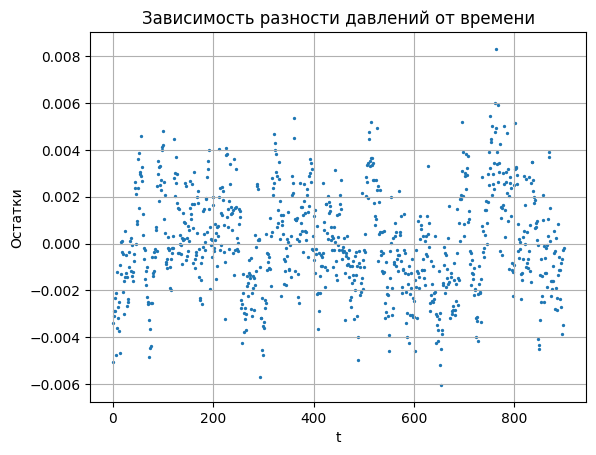

In [ ]:
plt.scatter(range(reminds[0].shape[0]), reminds[0], s=1.9)
plt.xlabel("t")
plt.ylabel("Остатки")
plt.title("Зависимость разности давлений от времени")
plt.grid()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

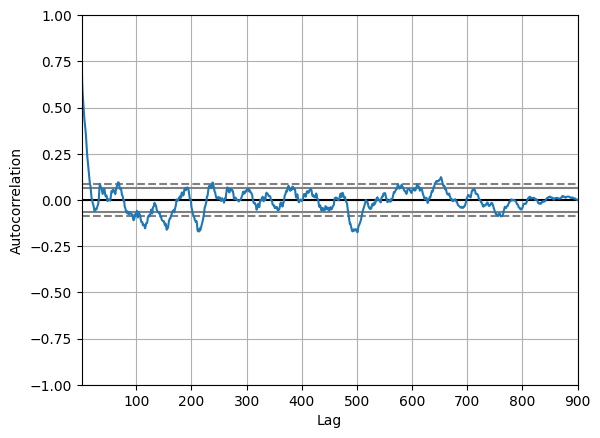

In [ ]:
autocorrelation_plot(reminds[0])

Разности

In [ ]:
diff = data.pct_change()
diff.dropna(inplace=True)

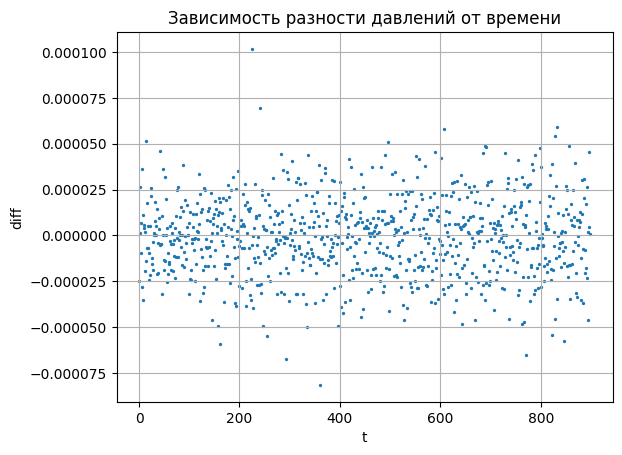

In [ ]:
plt.scatter(range(diff.shape[0]), diff, s=1.9)
plt.xlabel("t")
plt.ylabel("diff")
plt.title("Зависимость разности давлений от времени")
plt.grid()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

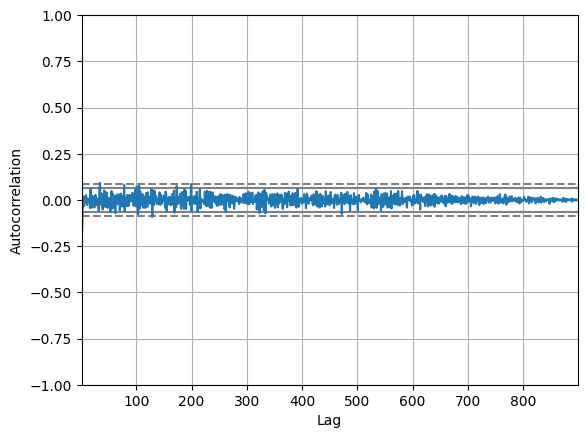

In [ ]:
autocorrelation_plot(diff)

Критерий Дикки-Фуллера

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result_test = adfuller(reminds[0])
result_test[1]

1.1998210620994626e-09

In [ ]:
# Для МНК
print("Ряд стационарен") if result_test[1] < 0.05 else print('Ряд не стационарен')

Ряд стационарен


In [ ]:
result_test = adfuller(diff)
result_test[1]

1.457260976760958e-29

In [ ]:
# Для разности
print("Ряд стационарен") if result_test[1] < 0.05 else print('Ряд не стационарен')

Ряд стационарен


Вычисление разности - более эффективный метод для приведения к стационарному ряду

In [ ]:
print(f"Вычисление разностей: {np.var(np.array(diff))}")
print(f"Разница между значениями модели и реальными значениями: {np.var(reminds)}")

Вычисление разностей: 4.5086074432082515e-10
Разница между значениями модели и реальными значениями: 4.762210738196383e-06


# Сезонность

In [ ]:
data_seasons = pd.read_excel('/content/drive/MyDrive/Time Series.xls', sheet_name='Расход на ГРС')

In [ ]:
data_seasons.dropna(inplace=True)

In [ ]:
data_seasons.head()

,Время,"Q, тыс. м3/сут"
1,00ч 10.01,338.0
2,02ч 10.01,318.0
3,04ч 10.01,331.0
4,06ч 10.01,374.0
5,08ч 10.01,530.0


### 1. Постройте график зависимости расхода от времени (“облако точек”) и его автокорреляционную функцию. Определите, имеется ли периодическая составляющая, оцените ее период k.

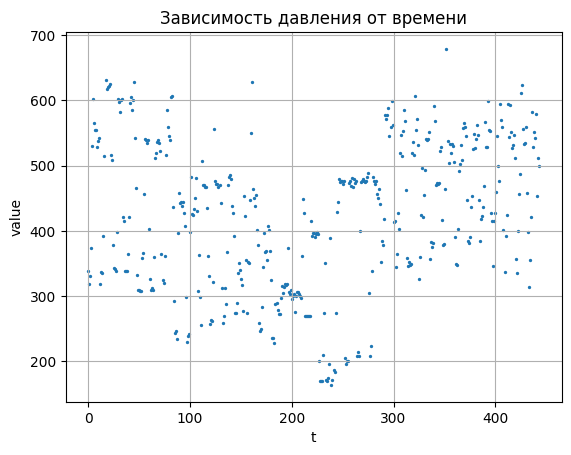

In [ ]:
plt.scatter(range(data_seasons['Q, тыс. м3/сут'].shape[0]), data_seasons['Q, тыс. м3/сут'], s=1.9)
plt.xlabel("t")
plt.ylabel("value")
plt.title("Зависимость давления от времени")
plt.grid()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

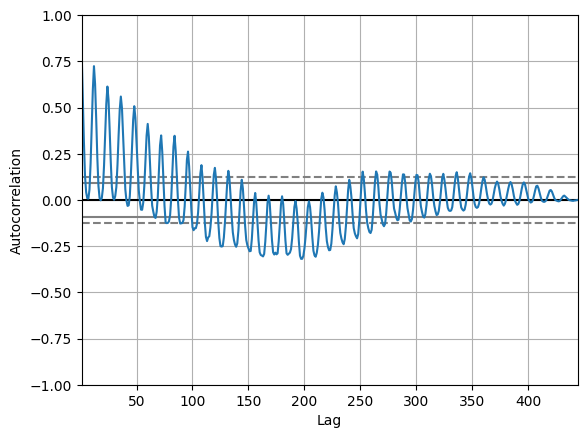

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_seasons['Q, тыс. м3/сут'])

Период К=12

### 2. Удалите тренд с помощью последовательных разностей

In [ ]:
diff = data_seasons['Q, тыс. м3/сут'].pct_change()
diff.dropna(inplace=True)

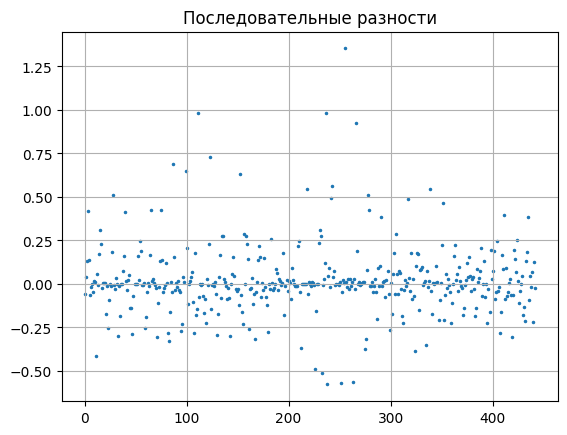

In [ ]:
plt.scatter(range(diff.shape[0]), diff, s=2.3)
plt.title("Последовательные разности")
plt.grid()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

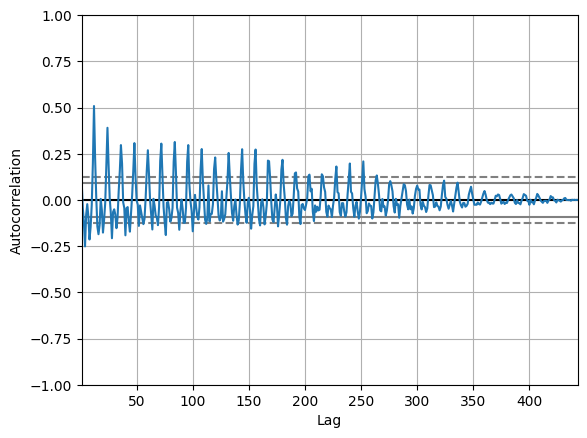

In [ ]:
autocorrelation_plot(diff)

### 3. Попробуйте привести ряд без тренда q к стационарному виду следующими методами:

###(a) методом наименьших квадратов оцените периодический тренд в виде тригонометрического разложения (отрезка ряда Фурье);

In [ ]:
t = (data_seasons.index - 1) * 2

In [ ]:
T = 24
k = np.array(range(1, 13))
X = pd.DataFrame(np.ones((t.shape[0], 1))).rename(columns={0: 'intercept'})
t_furie = 2 * np.pi * t / T

In [ ]:
def check_not_contain(array, array_of_array):
    for within_array in array_of_array:
        if list(within_array) == list(array):
            return False
    return True

In [ ]:
array_of_sin_cos = list()

for coeff in k:
    current_sin, current_cos = np.sin(coeff * t_furie), np.cos(coeff * t_furie)

    if check_not_contain(current_sin, array_of_sin_cos):
        X[f'sin({coeff * 2 * np.pi / T}t)'] = current_sin
        array_of_sin_cos.append(current_sin)

    if check_not_contain(current_cos, array_of_sin_cos):
        X[f'cos({coeff * 2 * np.pi / T}t)'] = current_cos
        array_of_sin_cos.append(current_cos)

In [ ]:
X.drop(X.shape[0] - 1, axis=0, inplace=True)

In [ ]:
y = data_seasons['Q, тыс. м3/сут'].diff().dropna()

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [ ]:
predictions = model.predict(X)

In [ ]:
res = y - predictions

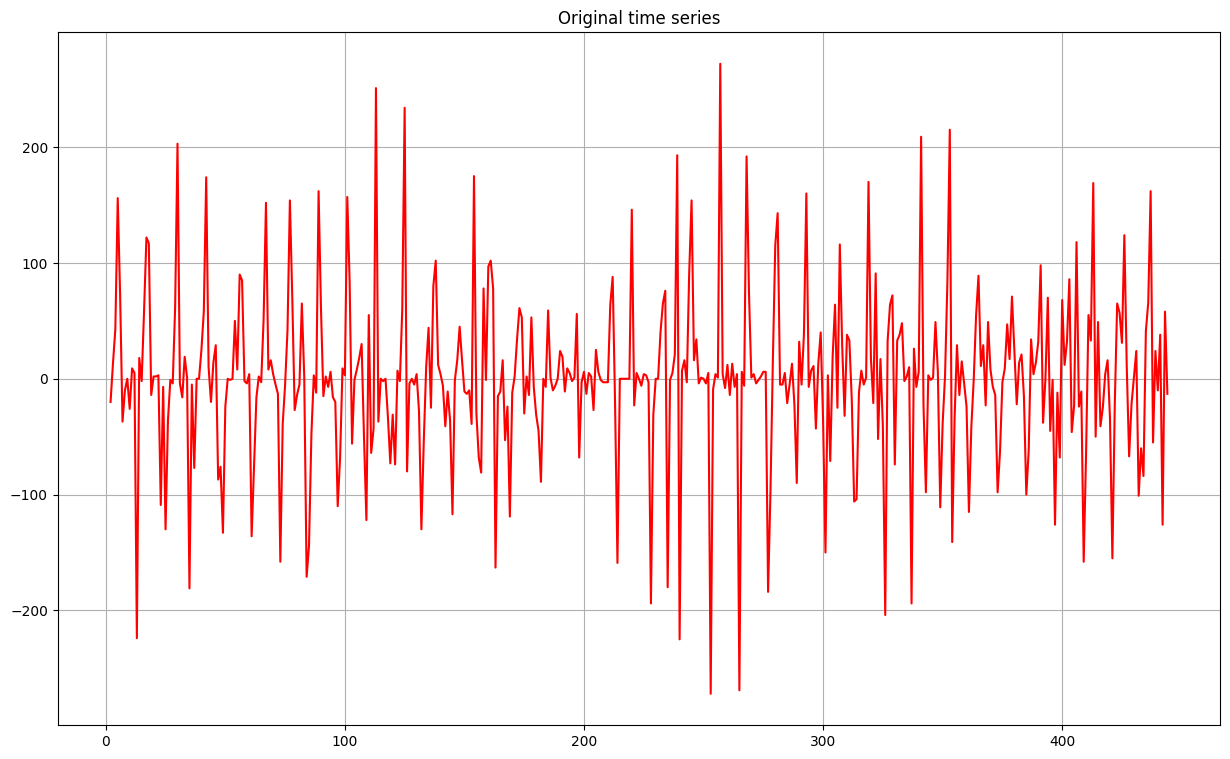

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(y, c='r')
plt.title("Original time series")
plt.grid()
plt.show()

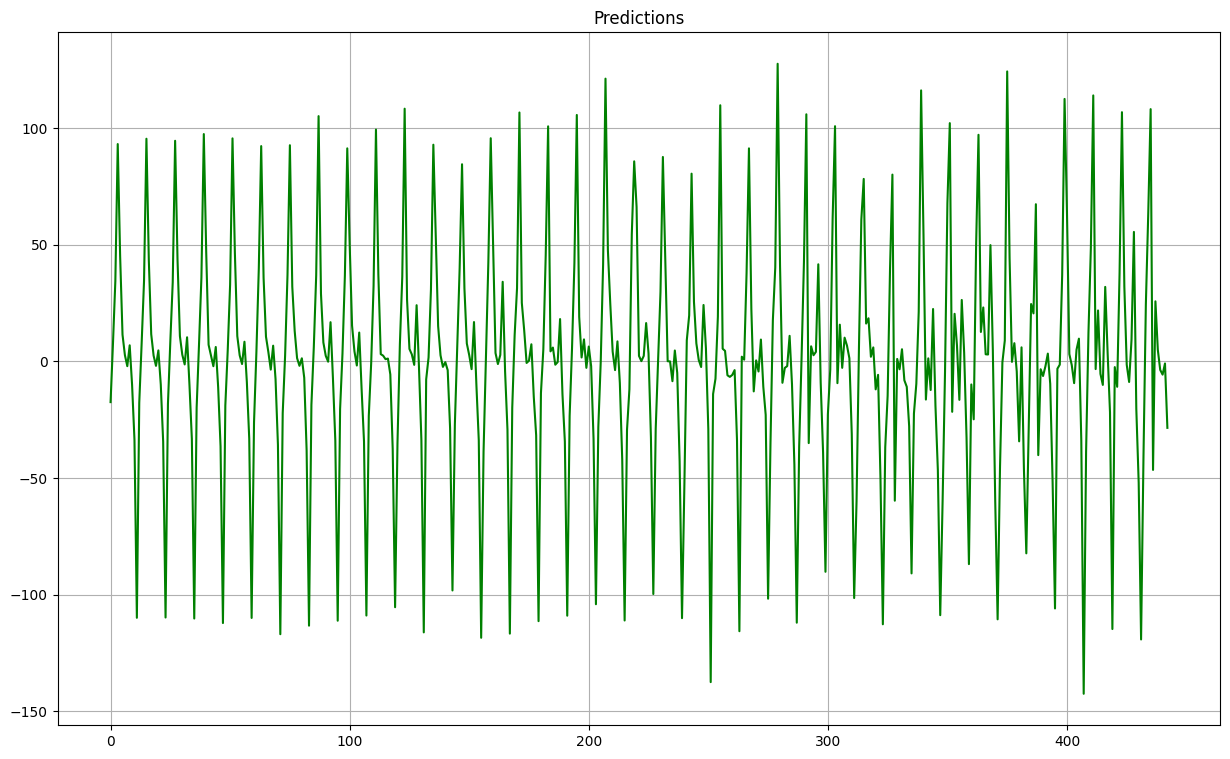

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(predictions, c='g')
plt.title("Predictions")
plt.grid()
plt.show()

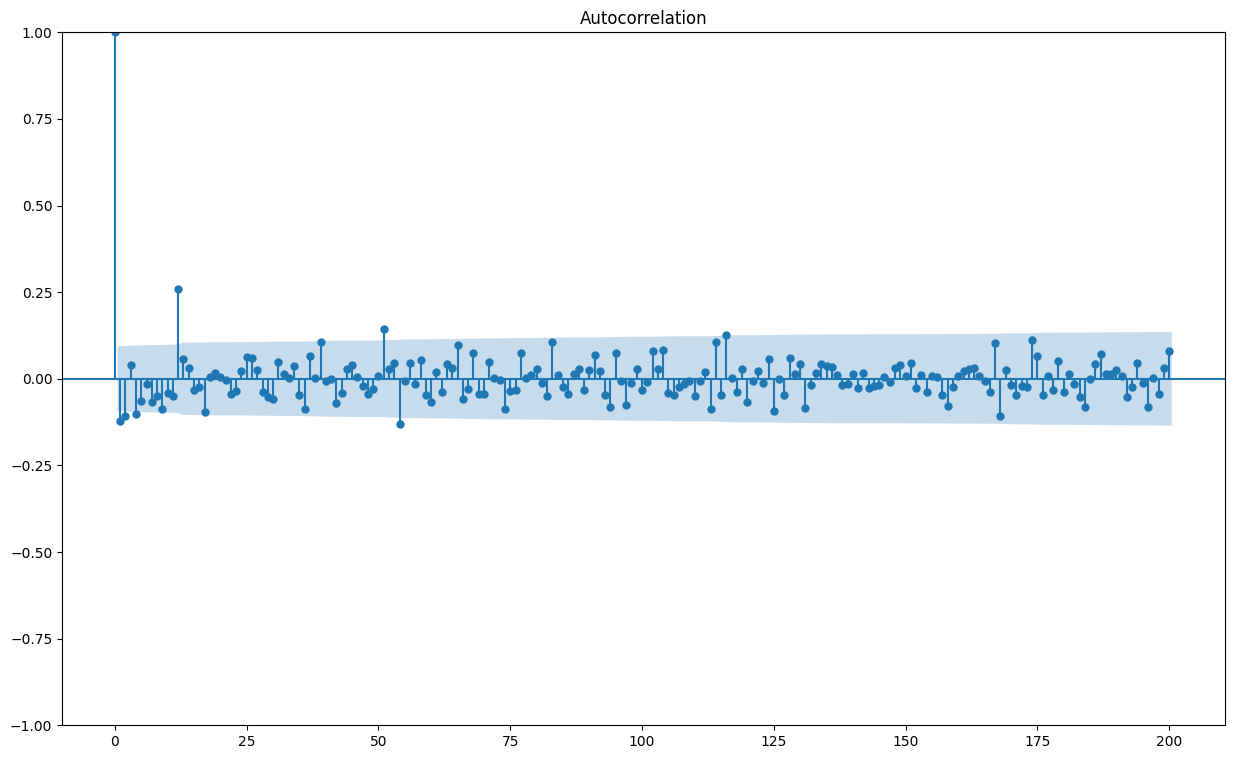

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
plot_acf(res, ax=ax, lags=200)
plt.show()

### (b) введите индикаторы (булевы переменные) для каждого времени суток (0 ч, 2 ч, ..., 24 ч) и методом наименьших квадратов оцените коэффициенты;

In [ ]:
times = ['00ч', '02ч', '04ч', '06ч', '08ч', '10ч', '12ч',
         '14ч', '16ч', '18ч', '20ч', '22ч']
for time in times:
    data_seasons[time] = data_seasons['Время'].apply(lambda x: 1 if x.split(" ")[0] == time else 0)

In [ ]:
data_seasons

,Время,"Q, тыс. м3/сут",00ч,02ч,04ч,06ч,08ч,10ч,12ч,14ч,16ч,18ч,20ч,22ч
1,00ч 10.01,338.0,1,0,0,0,0,0,0,0,0,0,0,0
2,02ч 10.01,318.0,0,1,0,0,0,0,0,0,0,0,0,0
3,04ч 10.01,331.0,0,0,1,0,0,0,0,0,0,0,0,0
4,06ч 10.01,374.0,0,0,0,1,0,0,0,0,0,0,0,0
5,08ч 10.01,530.0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,14ч 15.02,542.0,0,0,0,0,0,0,0,1,0,0,0,0
441,16ч 15.02,580.0,0,0,0,0,0,0,0,0,1,0,0,0
442,18ч 15.02,454.0,0,0,0,0,0,0,0,0,0,1,0,0
443,20ч 15.02,512.0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
new_data_categorical = np.concatenate((np.array(range(data_seasons.shape[0])).reshape(-1, 1), np.array(data_seasons[['00ч', '02ч', '04ч', '06ч', '08ч', '10ч', '12ч', '14ч', '16ч', '18ч', '20ч', '22ч']])), axis=1)

In [ ]:
lin_model_bool = LinearRegression()
lin_model_bool.fit(new_data_categorical, data_seasons['Q, тыс. м3/сут'])

LinearRegression()

In [ ]:
lin_model_bool.coef_

array([   0.1461231 ,  -87.13776441, -113.06767129, -111.40298358,
        -73.41397154,   25.03449996,   47.99648497,   55.33684836,
         56.16369824,   54.09865622,   65.3309115 ,   58.88749111,
         22.17380045])

### (c) вычислите периодический тренд как средние значения для каждого часа

In [ ]:
thrends = list()

for time in times:
    thrends.append(np.mean(data_seasons['Q, тыс. м3/сут'][data_seasons[time] == 1]))

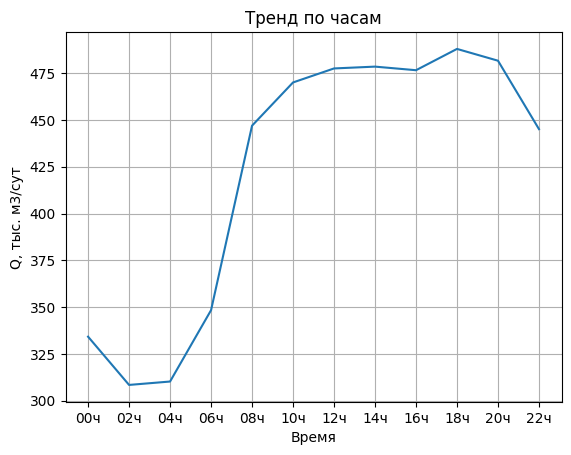

In [ ]:
plt.plot(times, thrends)
plt.title("Тренд по часам")
plt.xlabel('Время')
plt.ylabel('Q, тыс. м3/сут')
plt.grid()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

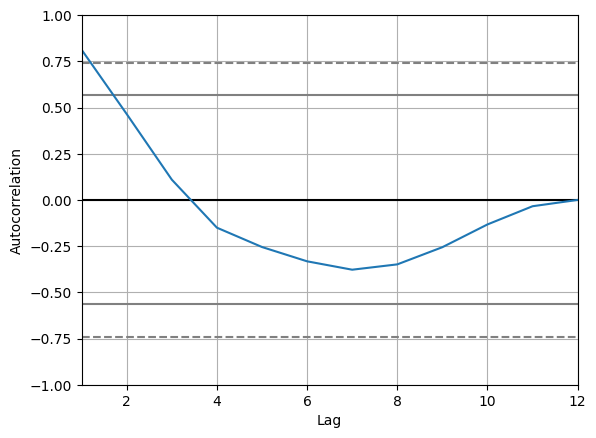

In [ ]:
autocorrelation_plot(thrends)

### (d) вычислите периодические (сезонные) разности

In [ ]:
diff_12 = data_seasons['Q, тыс. м3/сут'].pct_change(12)
diff_12.dropna(inplace=True)

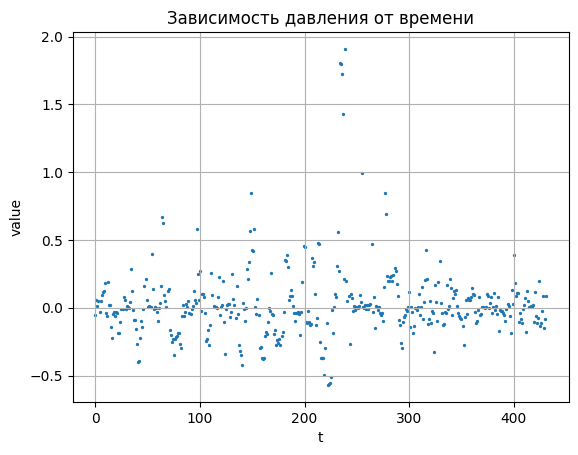

In [ ]:
plt.scatter(range(diff_12.shape[0]), diff_12, s=1.9)
plt.xlabel("t")
plt.ylabel("value")
plt.title("Зависимость давления от времени")
plt.grid()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

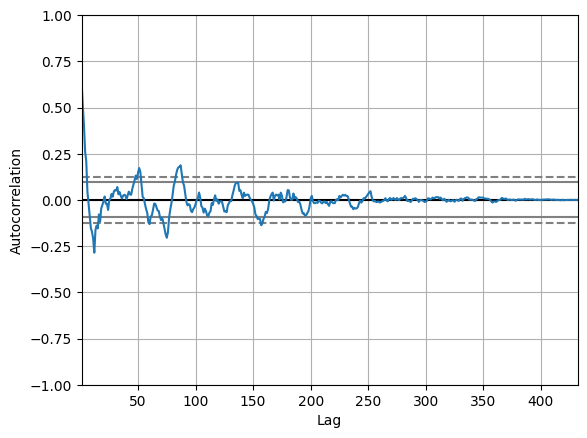

In [ ]:
autocorrelation_plot(diff_12)